In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd

# load dataset
df_airline = pd.read_csv('../data/dataset/airline.csv')
df_cache_map = pd.read_csv('../data/dataset/cache_map.csv')
df_day_schedule = pd.read_csv('../data/dataset/day_schedule.csv')
df_group = pd.read_csv('../data/dataset/group.csv')
df_order = pd.read_csv('../data/dataset/order.csv')
df_test = pd.read_csv('../data/testing-set.csv')
df_train = pd.read_csv('../data/training-set.csv')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')



c:\users\myps9\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396915 entries, 0 to 396914
Data columns (total 7 columns):
order_id         396915 non-null object
group_id         396915 non-null object
order_date       396915 non-null object
source_1         396915 non-null object
source_2         396915 non-null object
unit             396915 non-null object
people_amount    396915 non-null int64
dtypes: int64(1), object(6)
memory usage: 21.2+ MB


In [3]:
df_order.head(5)

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1


In [4]:
df_order.describe(include = 'all')

,order_id,group_id,order_date,source_1,source_2,unit,people_amount
count,396915,396915,396915,396915,396915,396915,396915.000000
unique,396915,45043,843,3,4,130,NaN
top,e5f7d80680b3cd526e4434855daec2c9,1ac092064f6c132cb8786e49ace26919,5-May-17,src1_value_1,src2_value_1,unit_value_6,NaN
freq,1,131,2095,271299,305353,56970,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.207004
std,NaN,NaN,NaN,NaN,NaN,NaN,3.147724
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [6]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49223 entries, 0 to 49222
Data columns (total 8 columns):
group_id          49223 non-null object
sub_line          49223 non-null object
area              49223 non-null object
days              49223 non-null float64
begin_date        49223 non-null object
price             49223 non-null float64
product_name      49218 non-null object
promotion_prog    49167 non-null object
dtypes: float64(2), object(6)
memory usage: 3.0+ MB


In [7]:
df_group[10:15]

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
10,10206,subline_value_1,area_value_2,10.0,13-Jan-17,64900.0,玩美加族~美西優瑟美地雙樂園十日遊（優瑟美地、大峽谷國家公園、拉斯維加斯摩天輪、環球影城、迪...,※造訪世界之最，甫於2014年3月31日開幕的[BB]拉斯維加斯摩天輪[//]，30分鐘的高...
11,50170,subline_value_1,area_value_2,10.0,13-Jan-17,55900.0,《每月一物》美西雄好玩～大峽谷國家公園．優勝美地．環球影城．雙賭城．海景火車．金門灣遊船１０天,"&lt;font face=""微軟正黑體"" size=""2""&gt;[GG]&lt;b&gt..."
12,16879,subline_value_1,area_value_3,7.0,14-Jan-17,40900.0,溫哥華西雅圖雙城7天》西雅圖派克市場．星巴克烘培工廠．亞馬遜書店．音樂博物館．玻璃館．深度溫哥華,"&lt;font face=""微軟正黑體"" font size=""3""&gt;[GG]《全新..."
13,48758,subline_value_1,area_value_2,10.0,19-Jan-17,64900.0,玩美加族~美西優瑟美地雙樂園十日遊（優瑟美地、大峽谷國家公園、拉斯維加斯摩天輪、環球影城、迪...,※造訪世界之最，甫於2014年3月31日開幕的[BB]拉斯維加斯摩天輪[//]，30分鐘的高...
14,35554,subline_value_1,area_value_2,10.0,19-Jan-17,64900.0,驚奇美西～迪士尼周邊飯店、優勝美地、大峽谷天空步道、環球影城(哈利波特)、美食饗宴10日,[GG]&lt;b&gt;《美國旅遊》&lt;/b&gt;[//]19世紀流傳著一個美國夢；...


In [8]:
df_group.describe(include = 'all')

,group_id,sub_line,area,days,begin_date,price,product_name,promotion_prog
count,49223,49223,49223,49223.000000,49223,49223.000000,49218,49167
unique,49223,23,157,NaN,629,NaN,6735,8330
top,64654,subline_value_11,area_value_93,NaN,27-Jan-17,NaN,【暢銷熱賣排行】小法國村．南怡島美境．葡萄酒莊．普羅旺斯村．汗蒸幕．明洞東大門五日(無樂園),"&lt;div class=""div880"" align=""center""&gt;&lt;i..."
freq,1,13089,5300,NaN,157,NaN,261,287
mean,NaN,NaN,NaN,6.245962,NaN,34705.866871,NaN,NaN
std,NaN,NaN,NaN,2.024880,NaN,20509.189141,NaN,NaN
min,NaN,NaN,NaN,2.000000,NaN,3000.000000,NaN,NaN
25%,NaN,NaN,NaN,5.000000,NaN,20900.000000,NaN,NaN
50%,NaN,NaN,NaN,5.000000,NaN,29900.000000,NaN,NaN
75%,NaN,NaN,NaN,8.000000,NaN,39900.000000,NaN,NaN


In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104275 entries, 0 to 104274
Data columns (total 6 columns):
group_id       104275 non-null object
go_back        104275 non-null object
fly_time       104275 non-null object
src_airport    104275 non-null object
arrive_time    104275 non-null object
dst_airport    104275 non-null object
dtypes: object(6)
memory usage: 4.8+ MB


In [10]:
df_airline.head(5)

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [11]:
df_airline.describe(include = 'all')

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
count,104275,104275,104275,104275,104275,104275
unique,48796,2,60216,204,60377,207
top,85c9b81cde3f2ca53424198d37189024,去程,2018/3/10 09:30,TPE 桃園機場,2017/8/14 13:30,TPE 桃園機場
freq,8,52223,10,40984,10,41125


In [12]:
df_day_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307046 entries, 0 to 307045
Data columns (total 3 columns):
group_id    307046 non-null object
day         307046 non-null float64
title       307035 non-null object
dtypes: float64(1), object(2)
memory usage: 7.0+ MB


In [13]:
df_day_schedule.head(5)

,group_id,day,title
0,63695,1.0,台北 [AIR]歐胡島市區觀光【州政府．皇宮．國王銅像．中國城】
1,63695,2.0,夏威夷小環島【鑽石頭山．恐龍灣．噴泉口】－珍珠港[BOATS]豪華愛之船Star of Ho...
2,63695,3.0,夏威夷 [AIR] 舊金山
3,63695,4.0,舊金山市區觀光【藝術宮．金門大橋．金門公園．漁人碼頭．金門灣遊船．市政廳．雙子峰．九曲花街】
4,63695,5.0,舊金山－300KM－優勝美地國家公園－100KM－佛雷斯諾


In [14]:
df_day_schedule.describe(include = 'all')

,group_id,day,title
count,307046,307046.000000,307035
unique,49158,NaN,28034
top,10490,NaN,台北
freq,17,NaN,3586
mean,NaN,4.269119,NaN
std,NaN,2.682089,NaN
min,NaN,1.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,6.000000,NaN


In [15]:
df_cache_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
file_name    321 non-null object
url          321 non-null object
dtypes: object(2)
memory usage: 5.1+ KB


In [16]:
df_cache_map.head(5)

,file_name,url
0,lion_cache_1.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
1,lion_cache_2.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
2,lion_cache_3.jpg,https://www.liontravel.com/Comm/2trs/hotsale/p...
3,lion_cache_4.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
4,lion_cache_5.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...


In [17]:
df_cache_map.describe(include = 'all')

,file_name,url
count,321,321
unique,321,321
top,lion_cache_20.jpg,https://www.liontravel.com/Comm/2TRS/HotSale/p...
freq,1,1


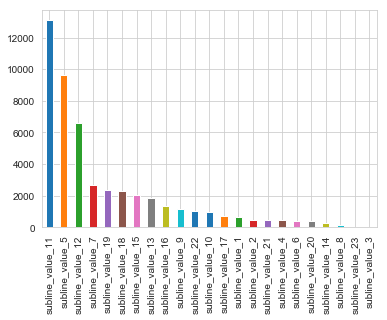

In [18]:
df_group['sub_line'].value_counts().plot.bar()

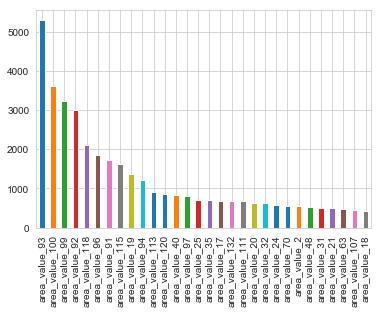

In [19]:
df_group['area'].value_counts().head(30).plot.bar()

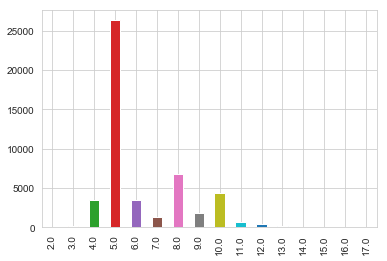

In [20]:
df_group['days'].value_counts().sort_index().plot.bar()

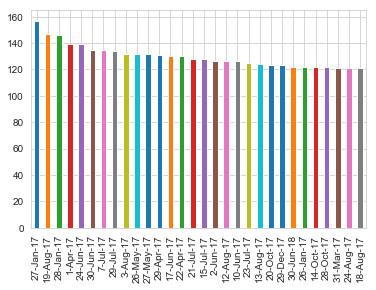

In [21]:
df_group['begin_date'].value_counts().head(30).plot.bar()

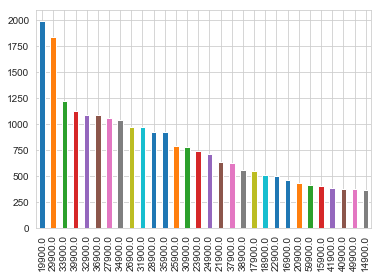

In [22]:
df_group['price'].value_counts().head(30).plot.bar()

In [23]:
import matplotlib

c:\users\myps9\appdata\local\programs\python\python37\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


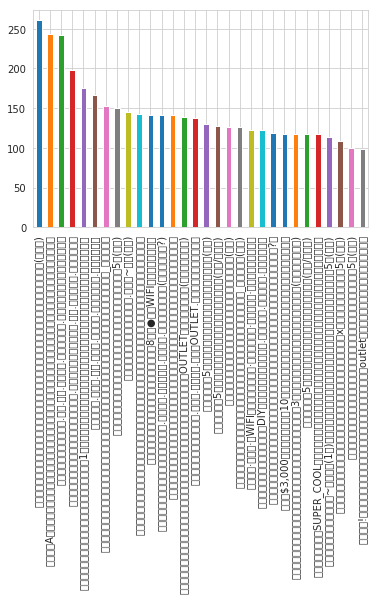

In [24]:
#coding:utf-8
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties  
import os.path
matplotlib.__file__
# zh_font = FontProperties(fname=os.path.abspath('wqy-microhei.ttc'))
# myfonts = findfont(FontProperties(family=FontProperties(fname=os.path.abspath('NotoSansCJKtc-Black.otf')).get_family())) 
# myfont
plt.rcParams['font.sans-serif'] = ['SimHei']
df_group['product_name'].value_counts().head(30).plot.bar()

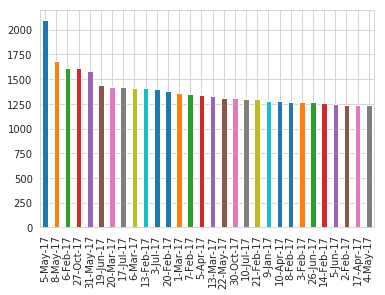

In [25]:
df_order['order_date'].value_counts().head(30).plot.bar()

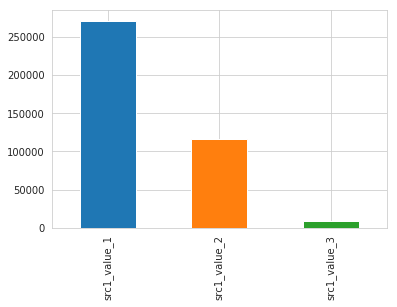

In [26]:
df_order['source_1'].value_counts().plot.bar()

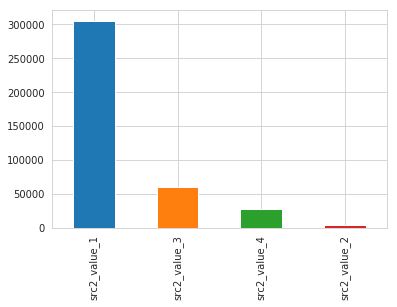

In [27]:
df_order['source_2'].value_counts().plot.bar()

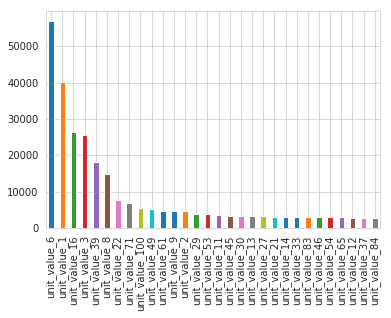

In [28]:
df_order['unit'].value_counts().head(30).plot.bar()

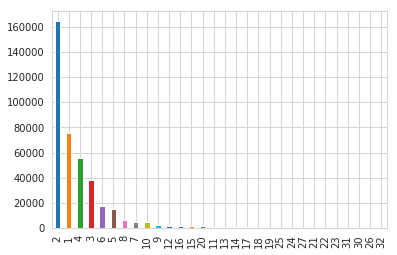

In [29]:
df_order['people_amount'].value_counts().head(30).plot.bar()

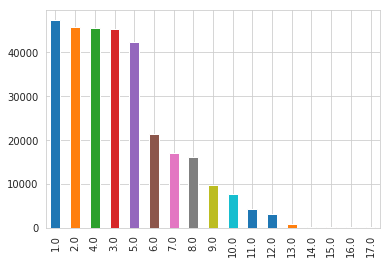

In [30]:
df_day_schedule['day'].value_counts().plot.bar()

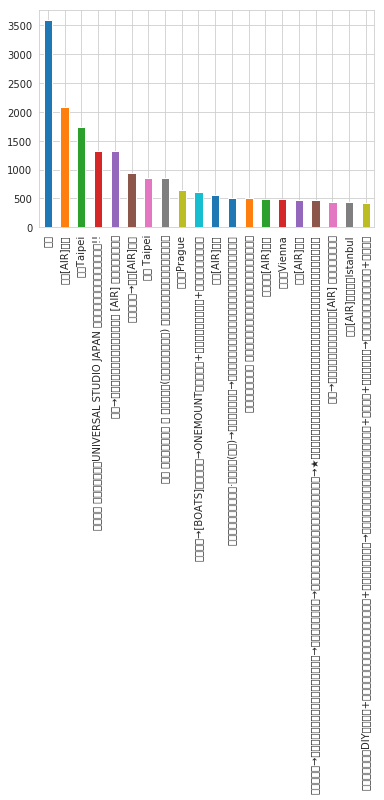

In [31]:
df_day_schedule['title'].value_counts().head(20).plot.bar()

c:\users\myps9\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


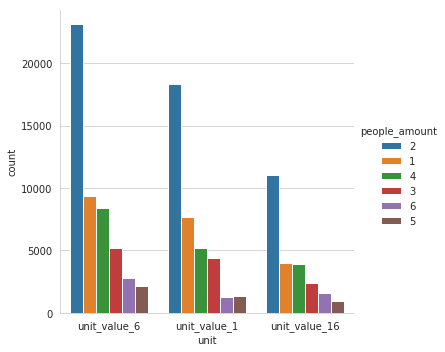

In [32]:
sns.factorplot('unit', data=df_order, hue='people_amount', 
               order=['unit_value_6', 'unit_value_1', 'unit_value_16'], 
               hue_order=[2, 1, 4, 3, 6, 5], kind='count')

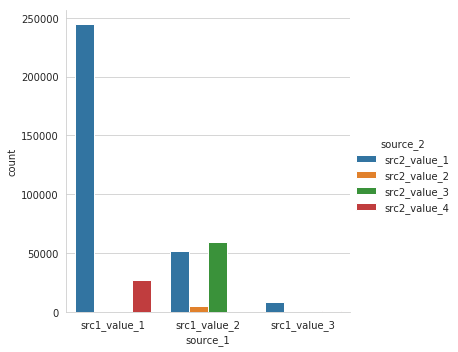

In [33]:
sns.factorplot('source_1', data=df_order, hue='source_2', kind='count')

In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

dtypes = {
    'order_id' : 'object',
    'group_id' : 'object'
}

# load dataset
df_airline = pd.read_csv('../data/dataset/airline.csv',dtype=dtypes)
df_cache_map = pd.read_csv('../data/dataset/cache_map.csv', dtype=dtypes)
df_day_schedule = pd.read_csv('../data/dataset/day_schedule.csv', dtype=dtypes)
df_group = pd.read_csv('../data/dataset/group.csv',dtype=dtypes)
df_order = pd.read_csv('../data/dataset/order.csv', dtype=dtypes)
df_test = pd.read_csv('../data/testing-set.csv', dtype=dtypes)
df_train = pd.read_csv('../data/training-set.csv', dtype=dtypes)

df_total = df_order.merge(df_group, on = 'group_id')

go_back = df_airline.groupby("go_back")
df_go = go_back.get_group("去程")
df_back = go_back.get_group("回程")
df_go.columns = ['go_' + str(col) for col in df_go.columns]
df_back.columns = ['back_' + str(col) for col in df_back.columns]
df_go = df_go.drop_duplicates(subset=['go_group_id', 'go_go_back'], keep='first')
df_back = df_back.drop_duplicates(subset=['back_group_id', 'back_go_back'], keep='last')
df_new_airline = pd.merge(df_go, df_back, left_on=['go_group_id'], right_on=['back_group_id'])
df_total = df_total.merge(df_new_airline, how='left', left_on='group_id', right_on='go_group_id')

df_merge_train = df_train.merge(df_total, on='order_id')

print(df_merge_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297020 entries, 0 to 297019
Data columns (total 27 columns):
order_id            297020 non-null object
deal_or_not         297020 non-null int64
group_id            297020 non-null object
order_date          297020 non-null object
source_1            297020 non-null object
source_2            297020 non-null object
unit                297020 non-null object
people_amount       297020 non-null int64
sub_line            297020 non-null object
area                297020 non-null object
days                297020 non-null float64
begin_date          297020 non-null object
price               297020 non-null float64
product_name        297013 non-null object
promotion_prog      296942 non-null object
go_group_id         295998 non-null object
go_go_back          295998 non-null object
go_fly_time         295998 non-null object
go_src_airport      295998 non-null object
go_arrive_time      295998 non-null object
go_dst_airport      295998 no

c:\users\myps9\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


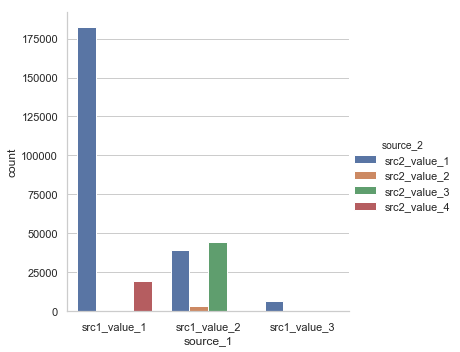

In [40]:
sns.factorplot('source_1', data=df_merge_train, hue='source_2', kind='count')

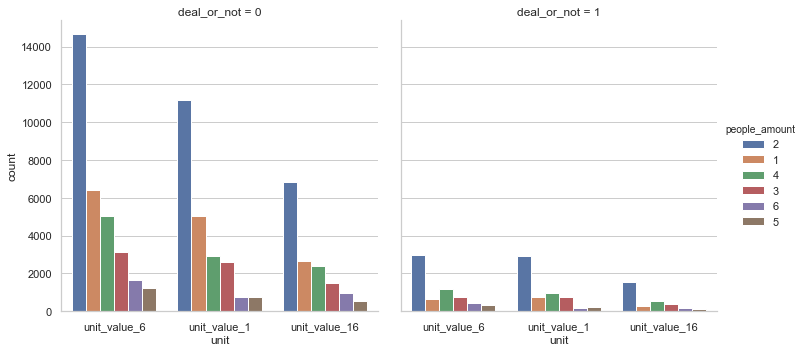

In [41]:
sns.factorplot('unit', data=df_merge_train, hue='people_amount', col='deal_or_not',
               order=['unit_value_6', 'unit_value_1', 'unit_value_16'], 
               hue_order=[2, 1, 4, 3, 6, 5], kind='count')

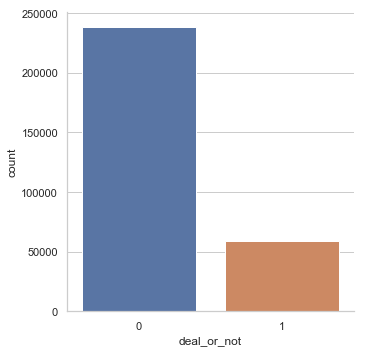

In [42]:
sns.factorplot('deal_or_not', data=df_train, kind='count')

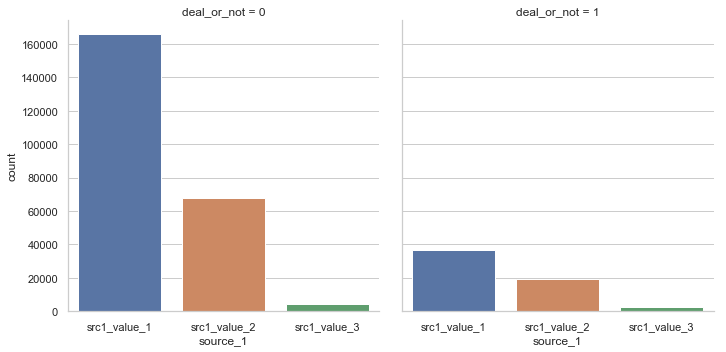

In [43]:
sns.factorplot('source_1', data=df_merge_train, col='deal_or_not', kind='count')

sns.factorplot('source_2', data=df_merge_train, col='deal_or_not', kind='count')

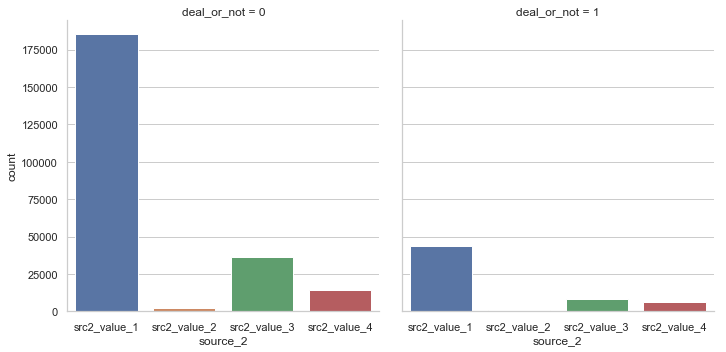

In [44]:
sns.factorplot('source_2', data=df_merge_train, col='deal_or_not', kind='count')

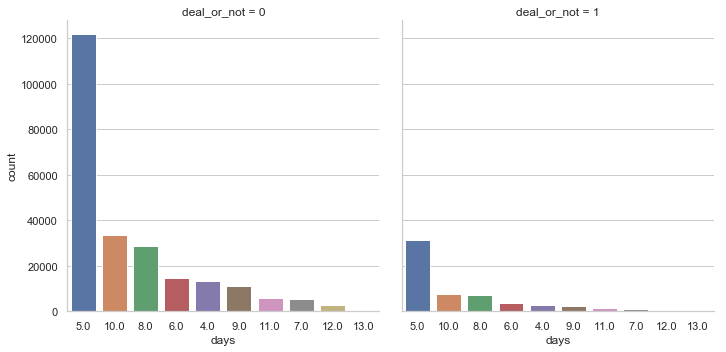

In [45]:
sns.factorplot('days', data=df_merge_train, col='deal_or_not',
               order=df_merge_train.days.value_counts().iloc[:10].index, kind='count')

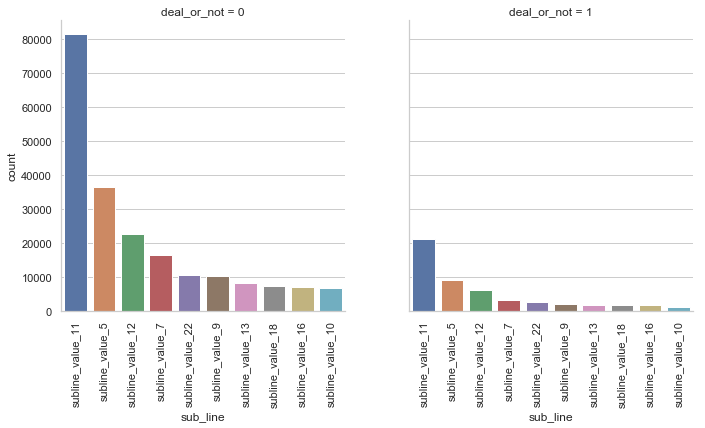

In [46]:
g = sns.factorplot('sub_line', data=df_merge_train, col='deal_or_not',
               order=df_merge_train.sub_line.value_counts().iloc[:10].index, kind='count')
g.set_xticklabels(rotation=90)

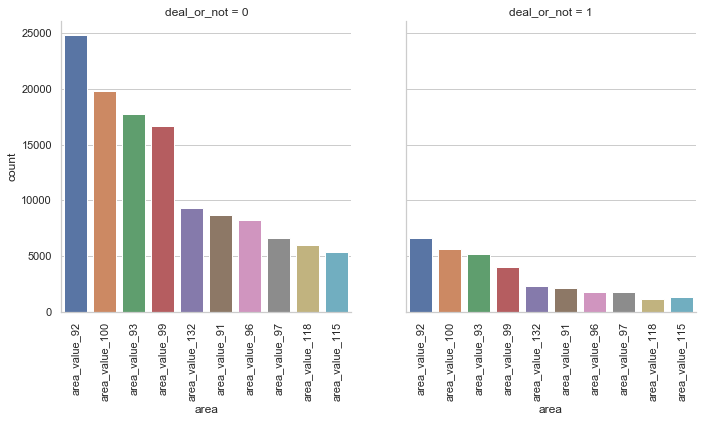

In [47]:
g = sns.factorplot('area', data=df_merge_train, col='deal_or_not',
               order=df_merge_train.area.value_counts().iloc[:10].index, kind='count')
g.set_xticklabels(rotation=90)